# **DenseNet121 on CT Scan Data for classifying tumours as Benign or Malignant**

Code Source: https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imports**

In [ ]:
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.pyplot as plt
import glob
import os
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import backend as K

import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

import h5py
import numpy as np
# import cv2
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
import numpy as np
# import os, cv2

from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
# import pickle

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

import tensorflow

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.8.2


In [ ]:
train_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/"
val_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/"
test_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/"
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

print(class_names)
print(class_names_test)

['Benign', 'Malignant']
['Benign', 'Malignant']


In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
val_generator = val_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 3644 images belonging to 2 classes.
Found 1561 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'Benign': 0, 'Malignant': 1}

In [ ]:
import os

train_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/Benign") # dir is your directory path
train_benign_number_files = len(train_benign_list)
train_benign_number_files


2633

In [ ]:
train_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/Malignant") # dir is your directory path
train_malignant_number_files = len(train_malignant_list)
train_malignant_number_files

1011

In [ ]:
val_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/Benign") # dir is your directory path
val_benign_number_files = len(val_benign_list)
val_benign_number_files

1128

In [ ]:
val_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/Malignant") # dir is your directory path
val_malignant_number_files = len(val_malignant_list)
val_malignant_number_files

433

In [ ]:
test_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/Benign") # dir is your directory path
test_benign_number_files = len(test_benign_list)
test_benign_number_files

376

In [ ]:
test_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/Malignant") # dir is your directory path
test_malignant_number_files = len(test_malignant_list)
test_malignant_number_files

144

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(16,10), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_generator)

In [ ]:
labels

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

**Defining the architecture for VGG16**

In [ ]:
base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

x=base_model.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='relu')(x) #FC-layer

model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.681184 to fit



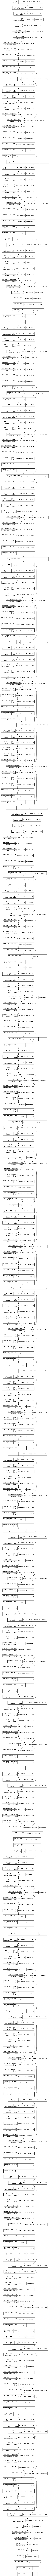

In [ ]:
dot_img_file = '/content/drive/MyDrive/Assignments/Assignment 3/DenseNet121.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

**Preprocessing the train and test images before training and validating the VGG16 model**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Applying Augmentaion on data to avoid overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
type(training_set)

Found 3644 images belonging to 2 classes.
Found 1561 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

### **Train with VGG19**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(training_set, steps_per_epoch = 20, validation_data = test_set, validation_steps = 20, epochs = 200, verbose = 2)

Epoch 1/200
20/20 - 82s - loss: 4.5409 - accuracy: 0.6313 - val_loss: 6.6601 - val_accuracy: 0.7437 - 82s/epoch - 4s/step
Epoch 2/200
20/20 - 55s - loss: 5.7587 - accuracy: 0.6062 - val_loss: 11.5322 - val_accuracy: 0.7563 - 55s/epoch - 3s/step
Epoch 3/200
20/20 - 47s - loss: 6.0191 - accuracy: 0.5312 - val_loss: 11.3416 - val_accuracy: 0.2562 - 47s/epoch - 2s/step
Epoch 4/200
20/20 - 43s - loss: 4.6099 - accuracy: 0.5437 - val_loss: 7.6510 - val_accuracy: 0.7000 - 43s/epoch - 2s/step
Epoch 5/200
20/20 - 39s - loss: 3.7354 - accuracy: 0.6687 - val_loss: 7.6499 - val_accuracy: 0.7125 - 39s/epoch - 2s/step
Epoch 6/200
20/20 - 39s - loss: 3.5154 - accuracy: 0.7750 - val_loss: 3.9132 - val_accuracy: 0.7437 - 39s/epoch - 2s/step
Epoch 7/200
20/20 - 38s - loss: 2.9487 - accuracy: 0.8000 - val_loss: 9.4831 - val_accuracy: 0.7500 - 38s/epoch - 2s/step
Epoch 8/200
20/20 - 36s - loss: 3.3686 - accuracy: 0.7875 - val_loss: 11.6285 - val_accuracy: 0.6375 - 36s/epoch - 2s/step
Epoch 9/200
20/20 - 3

**Variation of Train and Validation loss and accuracy with number of epochs**

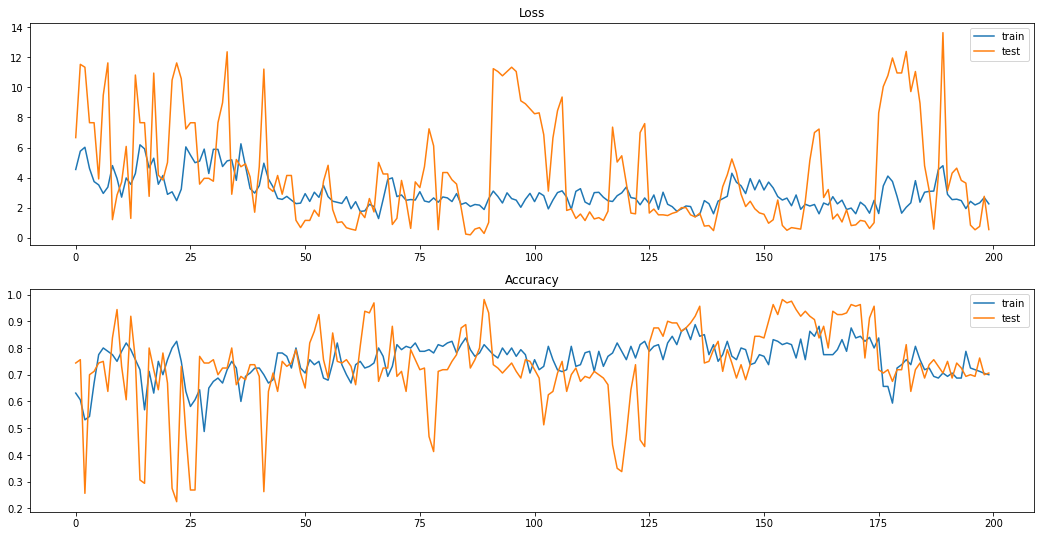

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,9)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/Assignments/Assignment 1/TrainTest_LossAccuracy_Graph_VGG16.png')
pyplot.show()

**Generating predictions on test set: Benign and Malignant**

In [ ]:
# import numpy as np
# from keras.preprocessing import image
# test_image =image.load_img('/content/drive/MyDrive/Assignments/Assignment 3/Custom_Dataset/Test/Benign/13.jpg',target_size = (224, 224))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = classifier.predict(test_image)
# #print(result[0][0])
# training_set.class_indices
# if result[0][0] == 1:
#   prediction = 'Malignant'
# else:
#   prediction = 'Benign'
# print(prediction)

In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

NameError: ignored

In [ ]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [ ]:
predicted_classes

In [ ]:
true_classes

**Generating model evaluation metrics on test set like confusion matrix, precision, recall,F1 score**

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [ ]:
len(true_classes)

In [ ]:
len(predicted_classes)

In [ ]:
confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6,5)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax, annot_kws={"fontsize":18});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);
ax.set_ylabel('True labels', fontsize=18);
ax.set_title('Confusion Matrix',fontsize=22);
ax.xaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);
ax.yaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);

plt.savefig('/content/drive/MyDrive/Assignments/Assignment 3/Confusion_Matrix_VGG16.png')

Val accuracy: 88.7%, Test accuracy: 86.4%